In [1]:
from diy_stable_diffusion.imports import *
from diy_stable_diffusion.attention import *
from diy_stable_diffusion.utils import *

from glob import glob
from fastprogress import progress_bar
from diffusers import AutoencoderKL, UNet2DConditionModel

In [2]:
# import timm

In [3]:
torch.set_printoptions(precision=4, linewidth=140, sci_mode=False)
torch.manual_seed(1)
mpl.rcParams['image.cmap'] = 'gray_r'
mpl.rcParams['figure.dpi'] = 70

set_seed(42)
if fc.defaults.cpus>8: fc.defaults.cpus=8

In [4]:
vae = AutoencoderKL.from_pretrained('stabilityai/sd-vae-ft-ema').cuda().requires_grad_(False)

# load prelatent data

In [3]:
## Data processing

In [5]:
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path = path_data/'bedroom'

In [6]:
# url = 'https://s3.amazonaws.com/fast-ai-imageclas/bedroom.tgz'
# if not path.exists():
#     path_zip = fc.urlsave(url, path_data)
#     shutil.unpack_archive('data/bedroom.tgz', 'data')

In [7]:
bs = 64

In [8]:
def to_img(f): return read_image(f, mode=ImageReadMode.RGB)/255

In [9]:
class ImagesDS:
    def __init__(self, spec):
        self.path = Path(path)
        self.files = glob(str(spec), recursive=True)
    def __len__(self): return len(self.files)
    def __getitem__(self, i): return to_img(self.files[i])[:, :256,:256]

In [10]:
# ds = ImagesDS(path/f'**/*.jpg')
# saveobj(ds, 'bedroom_datasets')

In [11]:
ds = torch.load('models/2024-01-26-bedroom_datasets-7f94c54a.pkl')

In [12]:
dl = DataLoader(ds, batch_size=bs, num_workers=fc.defaults.cpus)

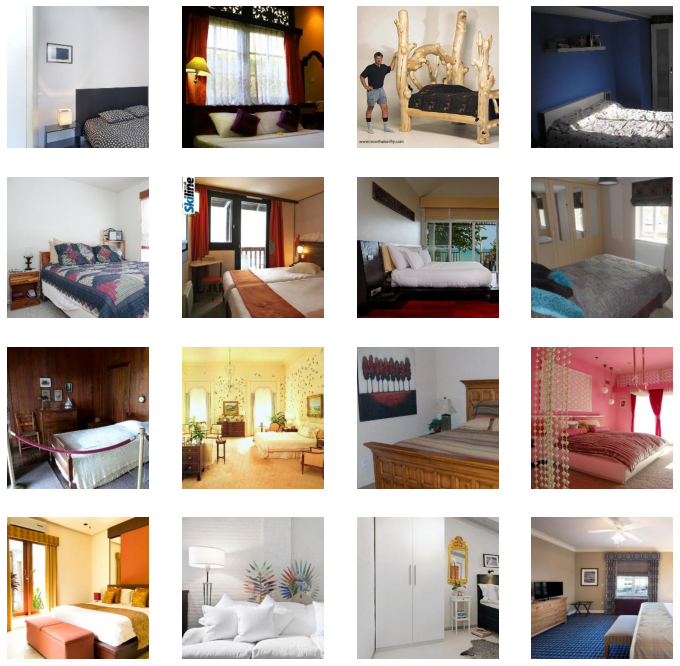

In [46]:
xb = next(iter(dl))
show_images(xb[:16])

In [58]:
xo = vae.encode(xb.cuda())
xe = xo.latent_dist.mean

In [59]:
xb.shape, xe.shape

(torch.Size([64, 3, 256, 256]), torch.Size([64, 4, 32, 32]))

In [60]:
xe.min(), xe.max()

(tensor(-44.6044, device='cuda:0'), tensor(39.5169, device='cuda:0'))

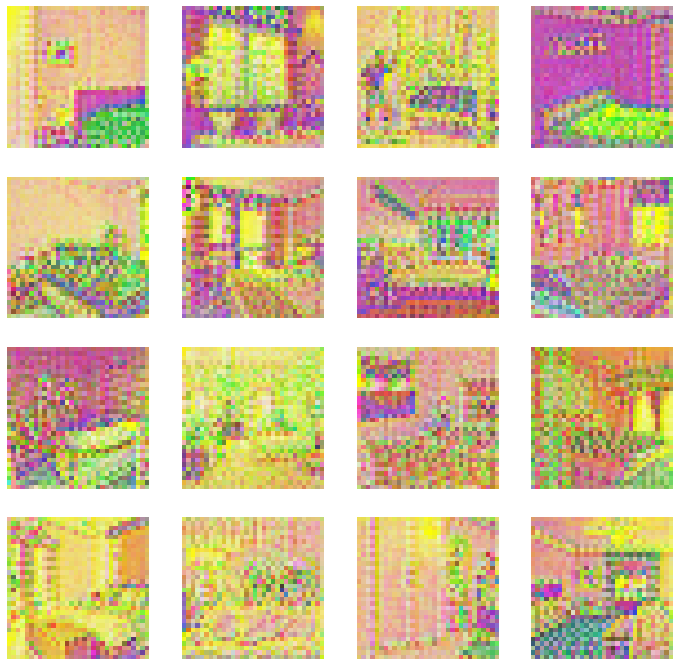

In [66]:
show_images((xe[:16, :3] / 4).sigmoid().cpu())

In [69]:
xd = vae.decode(xe)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

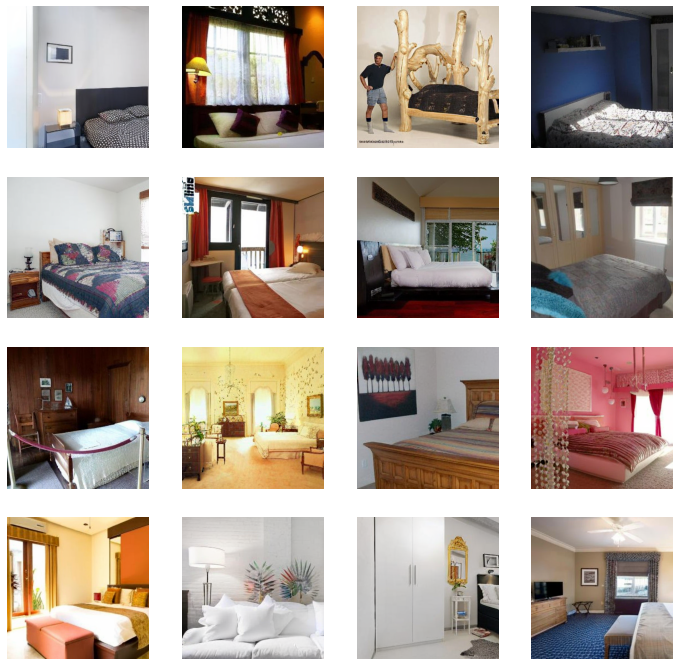

In [74]:
show_images(xd.sample[:16])

# load latents

In [5]:
mmpath = Path('data/bedroom/data.npmm')

In [6]:
mmshape = (303124,4,32,32)

In [7]:
# if not mmpath.exists():
#     a = np.memmap(mmpath, np.float32, mode='w+', shape=mmshape)
#     i = 0
#     for b in progress_bar(dl):
#         n = len(b)
#         a[i:i+n] = to_cpu(vae.encode(b.cuda()).latent_dist.mean).numpy()
#         i += n
#     a.flush()
#     del(a)

In [8]:
lats = np.memmap(mmpath, np.float32, mode='r', shape=mmshape)

In [9]:
lats.shape

(303124, 4, 32, 32)

In [25]:
lb = torch.tensor(lats[:16])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

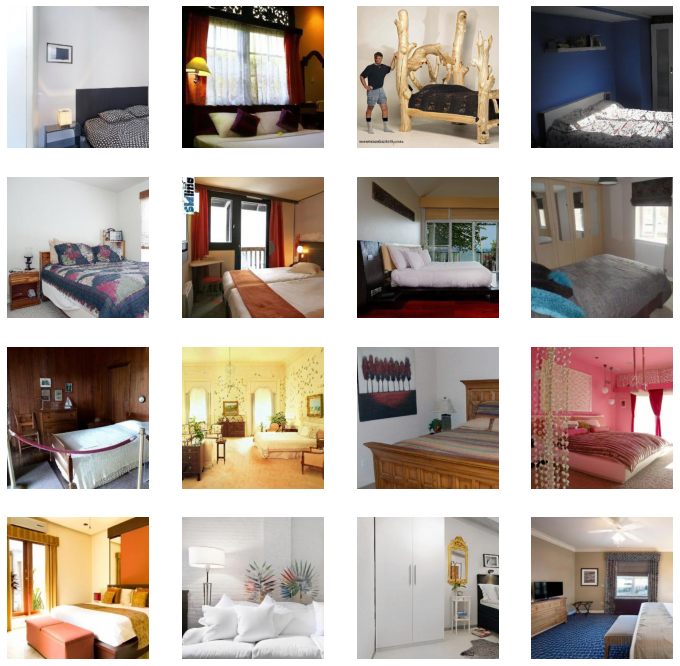

In [28]:
show_images(vae.decode(lb.cuda()).sample.cpu())

## Noisification

In [29]:
noisify??

Signature: noisify(x0)
Docstring: <no docstring>
Source:   
def noisify(x0):
    dev = x0.device
    t = torch.rand((x0.shape[0],), device=dev).clamp(0,0.999)
    noise=torch.randn_like(x0)
    abar_t=abar(t)[:,None, None, None]
    x_t = abar_t.sqrt() * x0 + (1-abar_t).sqrt() * noise
    return (x_t, t,), noise
File:      /usr/local/lib/python3.9/dist-packages/diy_stable_diffusion/attention.py
Type:      function


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

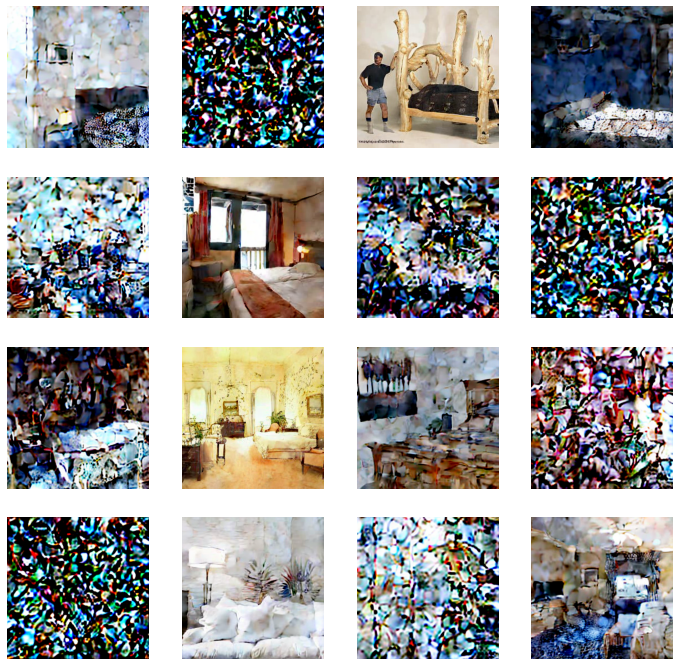

In [32]:
show_images(vae.decode(noisify(lb.cuda() * 0.2 )[0][0] * 5).sample.cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

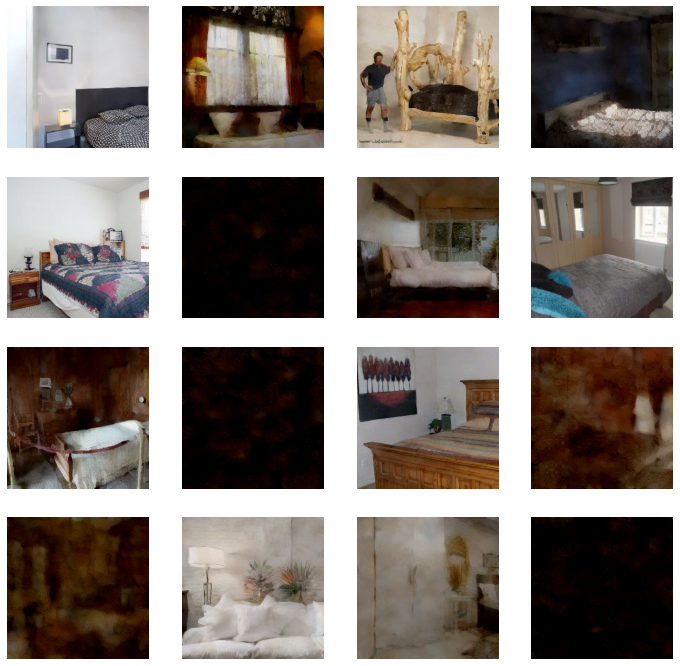

In [33]:
'''
without the weird divide then multiply by 5 thing
'''
show_images(vae.decode(noisify(lb.cuda())[0][0]).sample.cpu())

# Train denoiser

In [9]:
def collate_ddpm(batch):
    return noisify(default_collate(batch) * 0.2)

In [10]:
n = len(lats)
n_train = n - n//10
tds = lats[:n_train]
vds = lats[n_train:]

In [11]:
'''
best batch size I can get away with for training denoising model is 48 on 16gb

what about 48 gb?
'''
bs=156

In [12]:
dls= DataLoaders(*get_dls(tds, vds, bs=bs, num_workers=fc.defaults.cpus, collate_fn=collate_ddpm))

In [13]:
(xt, t), addednoise = next(iter(dls.train))

/usr/local/lib/python3.9/dist-packages/torch/utils/data/_utils/collate.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:172.)
  return default_collate([torch.as_tensor(b) for b in batch])
/usr/local/lib/python3.9/dist-packages/torch/utils/data/_utils/collate.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered intern

In [14]:
xt.shape, xt.device

(torch.Size([156, 4, 32, 32]), device(type='cpu'))

In [15]:
clean_mem()

In [16]:
'''
on un-oomed gpu, batch size 48 works for 16gb gpu
156 works for 48gb
'''
with torch.no_grad():
    xt_dec = vae.decode(xt.cuda()[:156] * 5).sample
xt_dec.shape

torch.Size([156, 3, 256, 256])

In [17]:
'''
Idea is taken from original resnet paper which says that, "by construction" a decent solution to certain problems
could be to, when computing the residual r(x) as in y = r(x) + x, sometimes just to 0 out the residual so that the
whole layer would be an identity function. And so at least, that's a good starting point. Remember these resblocks
are "residual" blocks, so zero-ing out the second conv initializes the whole resblock to be the identity function
and gradient descent will learn a solution that evolves out of that point.
'''

def init_denoising_model(model):
    for blk in model.downblocks + model.upblocks:
        for r in blk.erbs:
            r.conv2[-1].weight.data.zero_()

In [18]:
lr = 3e-3
epochs = 25
opt_func = partial(optim.AdamW, eps=1e-5)
tmax = epochs * len(dls.train)
sched = partial(lr_scheduler.OneCycleLR, max_lr=lr, total_steps=tmax)
'''
Almost forfot BatchSchedCB(sched) - takes in the scheduler callback and mutates LR in realtime
'''
cbs=[DeviceCB(), MixedPrecision(), MetricsCB(), ProgressCB(plot=True), BatchSchedCB(sched)]
model = EmbUNetModel(in_channels=4, out_channels=4, block_channel_counts=(128, 256, 512, 768), num_layers=2, attn_start=1, channels_per_head=16)
init_denoising_model(model)
learn = Learner(model, dls, loss_func=nn.MSELoss(), lr=lr, cbs=cbs, opt_func=opt_func)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/_utils/collate.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:172.)
  return default_collate([torch.as_tensor(b) for b in batch])
/usr/local/lib/python3.9/dist-packages/torch/utils/data/_utils/collate.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered intern

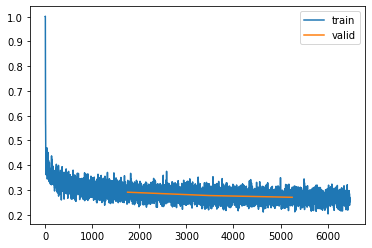

/usr/local/lib/python3.9/dist-packages/torch/utils/data/_utils/collate.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:172.)
  return default_collate([torch.as_tensor(b) for b in batch])
/usr/local/lib/python3.9/dist-packages/torch/utils/data/_utils/collate.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered intern

In [ ]:
'''
this run using bs=156. 1749 batches per epoch. There are 303,124 training latent images
'''
learn.fit(epochs)
saveobj(learn.model, 'denoise-unet-lsun-br')